In [ ]:
!pip install numpy==1.25.2

In [ ]:
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import scipy

In [ ]:
relaxed1_df = pd.read_csv('/content/relaxed_1.csv')
relaxed2_df = pd.read_csv('/content/relaxed_2.csv')
relaxed3_df = pd.read_csv('/content/relaxed_3.csv')
relaxed4_df = pd.read_csv('/content/relaxed_4.csv')
relaxed5_df = pd.read_csv('/content/relaxed_5.csv')
relaxed6_df = pd.read_csv('/content/relaxed_6.csv')
relaxed7_df = pd.read_csv('/content/relaxed_7.csv')
relaxed8_df = pd.read_csv('/content/relaxed_8.csv')
relaxed9_df = pd.read_csv('/content/relaxed_9.csv')


In [ ]:
focused2_df = pd.read_csv('/content/focused_2.csv')
focused3_df = pd.read_csv('/content/focused_3.csv')
focused4_df = pd.read_csv('/content/focused_4.csv')
focused5_df = pd.read_csv('/content/focused_5.csv')
focused6_df = pd.read_csv('/content/focused_6.csv')
focused7_df = pd.read_csv('/content/focused_7.csv')
focused8_df = pd.read_csv('/content/focused_8.csv')
focused9_df = pd.read_csv('/content/focused_9.csv')
focused10_df = pd.read_csv('/content/focused_10.csv')

In [ ]:
focused_1 = pd.read_csv('/content/day2_focused_1.csv')
focused_2 = pd.read_csv('/content/day2_focused_2.csv')
focused_3 = pd.read_csv('/content/day2_focused_3.csv')
focused_4 = pd.read_csv('/content/day2_focused_4.csv')

focused_1.columns  = focused_2.columns =focused_3.columns =focused_4.columns =  ['timestamp','values','labels']

In [ ]:
relaxed_1 = pd.read_csv('/content/day2_relaxed_1.csv')
relaxed_2 = pd.read_csv('/content/day2_relaxed_2.csv')
relaxed_3 = pd.read_csv('/content/day2_relaxed_3.csv')
relaxed_4 = pd.read_csv('/content/day2_relaxed_4.csv')

relaxed_1.columns = ['timestamp','values','labels']
relaxed_2.columns = ['timestamp','values','labels']
relaxed_3.columns = ['timestamp','values','labels']
relaxed_4.columns = ['timestamp','values','labels']

In [ ]:
# relaxed_df['label']  = pd.concat([relaxed1_df, relaxed2_df, relaxed3_df, relaxed4_df, relaxed5_df, relaxed6_df, relaxed7_df, relaxed8_df, relaxed9_df])

relaxed_df = pd.concat([relaxed_1, relaxed_2, relaxed_3, relaxed_4])

In [ ]:
relaxed_df.head()

,timestamp,values,labels
0,2025-07-25 14:02:03.022724,480,0
1,2025-07-25 14:02:03.025038,480,0
2,2025-07-25 14:02:03.026947,481,0
3,2025-07-25 14:02:03.029035,482,0
4,2025-07-25 14:02:03.030965,483,0


In [ ]:
focused_df = pd.concat([focused_1,focused_2,focused_3,focused_4])

In [ ]:
focused_df.head()

,timestamp,values,labels
0,2025-07-25 13:54:41.677221,533,1
1,2025-07-25 13:54:41.679177,531,1
2,2025-07-25 13:54:41.681426,532,1
3,2025-07-25 13:54:41.682981,534,1
4,2025-07-25 13:54:41.685003,535,1


In [ ]:
relaxed_df.head()

,timestamp,value,label,value_corrected
0,2025-07-24 11:33:38.908137,467,0,-35.407933
1,2025-07-24 11:33:38.909950,467,0,-35.407933
2,2025-07-24 11:33:38.912183,467,0,-35.407933
3,2025-07-24 11:33:38.914194,466,0,-36.407933
4,2025-07-24 11:33:38.916099,467,0,-35.407933


In [ ]:
focused_df.shape

(1468390, 4)

In [ ]:
relaxed_value = relaxed_df['values'].values
relaxed_label = relaxed_df['labels'].values
#

In [ ]:
 relaxed_label.shape

(932834,)

In [ ]:
print(relaxed_label)

[0 0 0 ... 0 0 0]


In [ ]:
focused_value = focused_df['values'].values
focused_label = focused_df['labels'].values

In [ ]:
print(focused_label)

[1 1 1 ... 1 1 1]


In [ ]:
features = []
labels = []

In [ ]:

combined_values = np.concatenate([relaxed_value, focused_value])
mean = combined_values.mean()
std = combined_values.std()

relaxed_value_z = (relaxed_value - mean) / std
focused_value_z = (focused_value - mean) / std


,value
0,-1.900790
1,-1.900790
2,-1.900790
3,-1.944093
4,-1.900790
...,...
341648,-2.853448
341649,-2.853448
341650,-2.636935
341651,-2.463724


In [ ]:


for i in range(0, len(relaxed_value_z)-250, 250):
    segment = relaxed_value_z[i:i+250]
    if len(segment) == 250:
        features.append(segment)
        labels.append(relaxed_label[i])
    else:
        print(f"Skipped relaxed at index {i} with length {len(segment)}")

for i in range(0, len(focused_value_z)-250, 250):
    segment = focused_value_z[i:i+250]
    if len(segment) == 250:
        features.append(segment)
        labels.append(focused_label[i])
    else:
      print(f"Skipped focused at index {i} with length {len(segment)}")


In [ ]:
features = np.array(features)
features.shape

labels = np.array(labels)
labels = labels[:-1]
labels.shape

(7523,)

In [ ]:
features.shape

(7524, 250)

In [ ]:
import numpy as np

# Suppose features.shape = (31661, 250)

new_features = []

for i in range(len(features) - 1):
    combined = np.vstack([features[i], features[i+1]])  # shape (2, 250)
    new_features.append(combined)

new_features = np.array(new_features)  # shape (31660, 2, 250)

print(new_features.shape)

# Now add channel dimension at the end to make it (31660, 2, 250, 1)
new_features = new_features[..., np.newaxis]

print(new_features.shape)  # should print (31660, 2, 250, 1)


(7523, 2, 250)
(7523, 2, 250, 1)


In [ ]:
np.unique(labels)

array([0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(new_features, labels, test_size=0.2, random_state=42, stratify=labels)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import ConvLSTM1D, Dense, Flatten, Input
from tensorflow.keras.models import Model

inp = Input(shape=(2, 250, 1))  # time_steps=2, rows=250, channels=1

# First ConvLSTM1D layer with recurrent_dropout
x = ConvLSTM1D(filters=16, kernel_size=3, padding='same', return_sequences= True, recurrent_dropout=0.2)(inp)

# Second ConvLSTM1D layer with recurrent_dropout
x = ConvLSTM1D(filters=32, kernel_size=3, padding='same', return_sequences=True, recurrent_dropout=0.2)(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
out = Dense(1, activation='sigmoid')(x)  # For binary classification

model = Model(inputs=inp, outputs=out)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 2, 250, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_5 (ConvLSTM1D)      │ (None, 2, 250, 16)     │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_6 (ConvLSTM1D)      │ (None, 2, 250, 32)     │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     1,024,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,046,017 (3.99 MB)

 Trainable params: 1,046,017 (3.99 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 56s 300ms/step - accuracy: 0.5857 - loss: 0.6665 - val_accuracy: 0.6174 - val_loss: 0.6559
Epoch 2/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 85s 323ms/step - accuracy: 0.6346 - loss: 0.6486 - val_accuracy: 0.6079 - val_loss: 0.6538
Epoch 3/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 47s 311ms/step - accuracy: 0.6321 - loss: 0.6480 - val_accuracy: 0.6215 - val_loss: 0.6501
Epoch 4/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 49s 323ms/step - accuracy: 0.6247 - loss: 0.6468 - val_accuracy: 0.6120 - val_loss: 0.6545
Epoch 5/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 79s 304ms/step - accuracy: 0.6233 - loss: 0.6502 - val_accuracy: 0.6190 - val_loss: 0.6501
Epoch 6/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 47s 310ms/step - accuracy: 0.6280 - loss: 0.6498 - val_accuracy: 0.6215 - val_loss: 0.6508
Epoch 7/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 81s 304ms/step - accuracy: 0.6326 - loss: 0.6444 - val_accuracy: 0.6137 - val_loss: 0.6549
Epoch 8/10
153/153 ━━━━━━━━━━━━━━━━━━━━ 45s 296ms/step - accuracy: 0.6349 - loss: 0

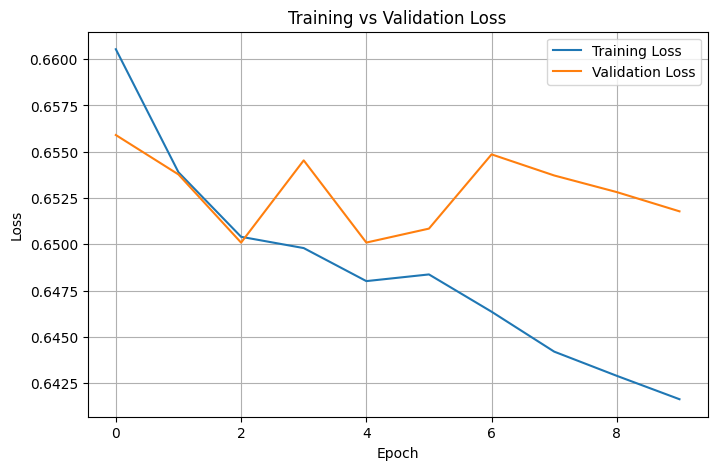

In [ ]:
import matplotlib.pyplot as plt

# Fit your model
history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data = (X_val,y_val))

# Plot training vs validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.save('cnnlstm.keras')

In [ ]:
rohan_df = pd.read_csv('/content/rohan.csv')


In [ ]:
rohan_df.columns = ['time','value','label']

In [ ]:
values = rohan_df['value'].values
label = rohan_df['label'].values

In [ ]:
mean = values.mean()
std = values.std()

values = (values - mean)/std

In [ ]:
features = []
labels = []

In [ ]:
for i in range(0, len(values)-250, 250):
    segment = values[i:i+250]
    if len(segment) == 250:
        features.append(segment)
        labels.append(label[i])
    else:
        print(f"Skipped at index {i} with length {len(segment)}")

In [ ]:
features = np.array(features)
labels = np.array(labels)

In [ ]:
features.shape
labels.shape

(1752,)

In [ ]:
import numpy as np

# Suppose features.shape = (31661, 250)

new_features = []

for i in range(len(features) - 1):
    combined = np.vstack([features[i], features[i+1]])  # shape (2, 250)
    new_features.append(combined)

new_features = np.array(new_features)  # shape (31660, 2, 250)

print(new_features.shape)

# Now add channel dimension at the end to make it (31660, 2, 250, 1)
new_features = new_features[..., np.newaxis]

print(new_features.shape)  # should print (31660, 2, 250, 1)


(1751, 2, 250)
(1751, 2, 250, 1)


In [ ]:
pred = model.predict(new_features)

55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step


In [ ]:
prediction = np.round(pred)
accuracy = np.mean(prediction == labels)
print(f"Accuracy: {accuracy * 100:.2f}%")



Accuracy: 45.57%


In [ ]:
from scipy.stats import skew
import scipy.signal

def psd(segment,sampling_rate):
    f,psd = scipy.signal.welch(segment,sampling_rate,noverlap=len(segment)//2,nperseg=len(segment))



    alpha_indices = np.where((f >= 8) & (f <= 13))
    beta_indices = np.where((f >= 14) & (f <= 30))
    theta_indices = np.where((f >= 4) & (f <= 7))
    delta_indices = np.where((f >= 0.5) & (f <= 3))

    energy_alpha = np.sum(psd[alpha_indices])
    energy_beta = np.sum(psd[beta_indices])
    energy_theta = np.sum(psd[theta_indices])
    energy_delta = np.sum(psd[delta_indices])

    alpha_beta_ratio = energy_alpha / energy_beta
    peak_frequency = f[np.argmax(psd)]

    spectral_centroid = np.sum(f * psd) / np.sum(psd)

    log_f = np.log(f[1:])
    log_psd = np.log(psd[1:])
    spectral_slope = np.polyfit(log_f, log_psd, 1)[0]

    alpha_relative_power = np.sum(psd[alpha_indices]) / np.sum(psd)
    beta_relative_power = np.sum(psd[beta_indices]) / np.sum(psd)

    alpha_skew = skew(psd[alpha_indices])
    beta_skew = skew(psd[beta_indices])

    alpha_var = np.var(psd[alpha_indices])
    beta_var = np.var(psd[beta_indices])

    return {
        'peak_frequency': peak_frequency,
        'spectral_centroid': spectral_centroid,
        'spectral_slope': spectral_slope,
        'E_alpha': energy_alpha,
        'E_beta': energy_beta,
        'E_theta': energy_theta,
        'E_delta': energy_delta,
        'alpha_beta_ratio': alpha_beta_ratio,
        'alpha_relative_power': alpha_relative_power,
        'beta_relative_power': beta_relative_power,
        'alpha_skew': alpha_skew,
        'beta_skew': beta_skew,
        'alpha_var': alpha_var,
    }






In [ ]:

combined_values = np.concatenate([relaxed_value, focused_value])
# mean = combined_values.mean()
# std = combined_values.std()

# relaxed_value_z = (relaxed_value - mean) / std
# focused_value_z = (focused_value - mean) / std


In [ ]:
features_f = []
label_f = []

In [ ]:
# frequency domain autoencoder for feature extraction
for j in range(0,len(relaxed_value_z)-500,250):
    segment = relaxed_value_z[j:j+500]
    segment_label = relaxed_label[j]
    temp = psd(segment,500)
    features_f.append(list(temp.values()))
    label_f.append(segment_label)






# X_f = np.array(features_f)
# y_f = np.array(label_f)

In [ ]:
# frequency domain autoencoder for feature extraction
for j in range(0,len(focused_value_z)-500,250):
    segment = focused_value_z[j:j+500]
    segment_label = focused_label[j]
    temp = psd(segment,500)
    features_f.append(list(temp.values()))
    label_f.append(segment_label)








In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pickle

# Assuming features_f and label_f are already defined lists
X_f = np.array(features_f)
y_f = np.array(label_f)

# Initialize and fit StandardScaler
scaler = StandardScaler()
X_f_scaled = scaler.fit_transform(X_f)

# Save the scaler for later use
with open('scaler_surya_day2.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scaler fitted and saved as scaler.pkl")


Scaler fitted and saved as scaler.pkl


In [ ]:
print(X_f.shape,y_f.shape)

(7522, 13) (7522,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(X_f, y_f, test_size=0.2, random_state=42,stratify=y_f)

In [ ]:
np.unique(y_f)

array([0, 1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train_f, y_train_f)

# Predict on test set
y_pred = rf.predict(X_val_f)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_val_f, y_pred))

# Detailed classification report
print(classification_report(y_val_f, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val_f, y_pred))


Accuracy: 0.7036544850498339
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       746
           1       0.72      0.68      0.70       759

    accuracy                           0.70      1505
   macro avg       0.70      0.70      0.70      1505
weighted avg       0.70      0.70      0.70      1505

Confusion Matrix:
 [[545 201]
 [245 514]]


In [ ]:
import pickle

# Save the model
with open('random_forest_model_surya.pkl', 'wb') as f:
    pickle.dump(rf, f)

print("Model saved successfully.")


Model saved successfully.


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb.fit(X_train_f,y_train_f)

# Predict on test set
y_pred = gb.predict(X_val_f)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_val_f, y_pred))

# Detailed classification report
print(classification_report(y_val_f, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_val_f, y_pred))


Accuracy: 0.6983388704318937
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       746
           1       0.71      0.67      0.69       759

    accuracy                           0.70      1505
   macro avg       0.70      0.70      0.70      1505
weighted avg       0.70      0.70      0.70      1505

Confusion Matrix:
 [[541 205]
 [249 510]]


In [ ]:
import pickle

# Save the model
with open('gradient_boost.pkl', 'wb') as f:
    pickle.dump(gb, f)

print("Model saved successfully.")


Model saved successfully.


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler



param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

svc = SVC(probability=True)

grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2, n_jobs=2)

grid_search.fit(X_train_f, y_train_f)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

model = grid_search.best_estimator_
y_pred = model.predict(X_val_f)
test_accuracy = model.score(X_val_f, y_val_f)
print("Test set accuracy: {:.2f}".format(test_accuracy))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


KeyboardInterrupt: 

In [ ]:
# autoencoder model for frequency domain

#encoder model

encoder_input = keras.Input(shape = (13,))
x = keras.layers.Dense(20, activation='relu',kernel_regularizer = keras.regularizers.l1(0.00015))(encoder_input)
x = keras.layers.Dense(10, activation='relu')(x)
encoder_output = keras.layers.Dense(5,activation = 'linear')(x)

#decoder model

x = keras.layers.Dense(10, activation='relu')(encoder_output)
x = keras.layers.Dense(20, activation='relu',kernel_regularizer=keras.regularizers.l1(0.00015))(x)
decoder_output = keras.layers.Dense(13,activation = 'linear')(x)

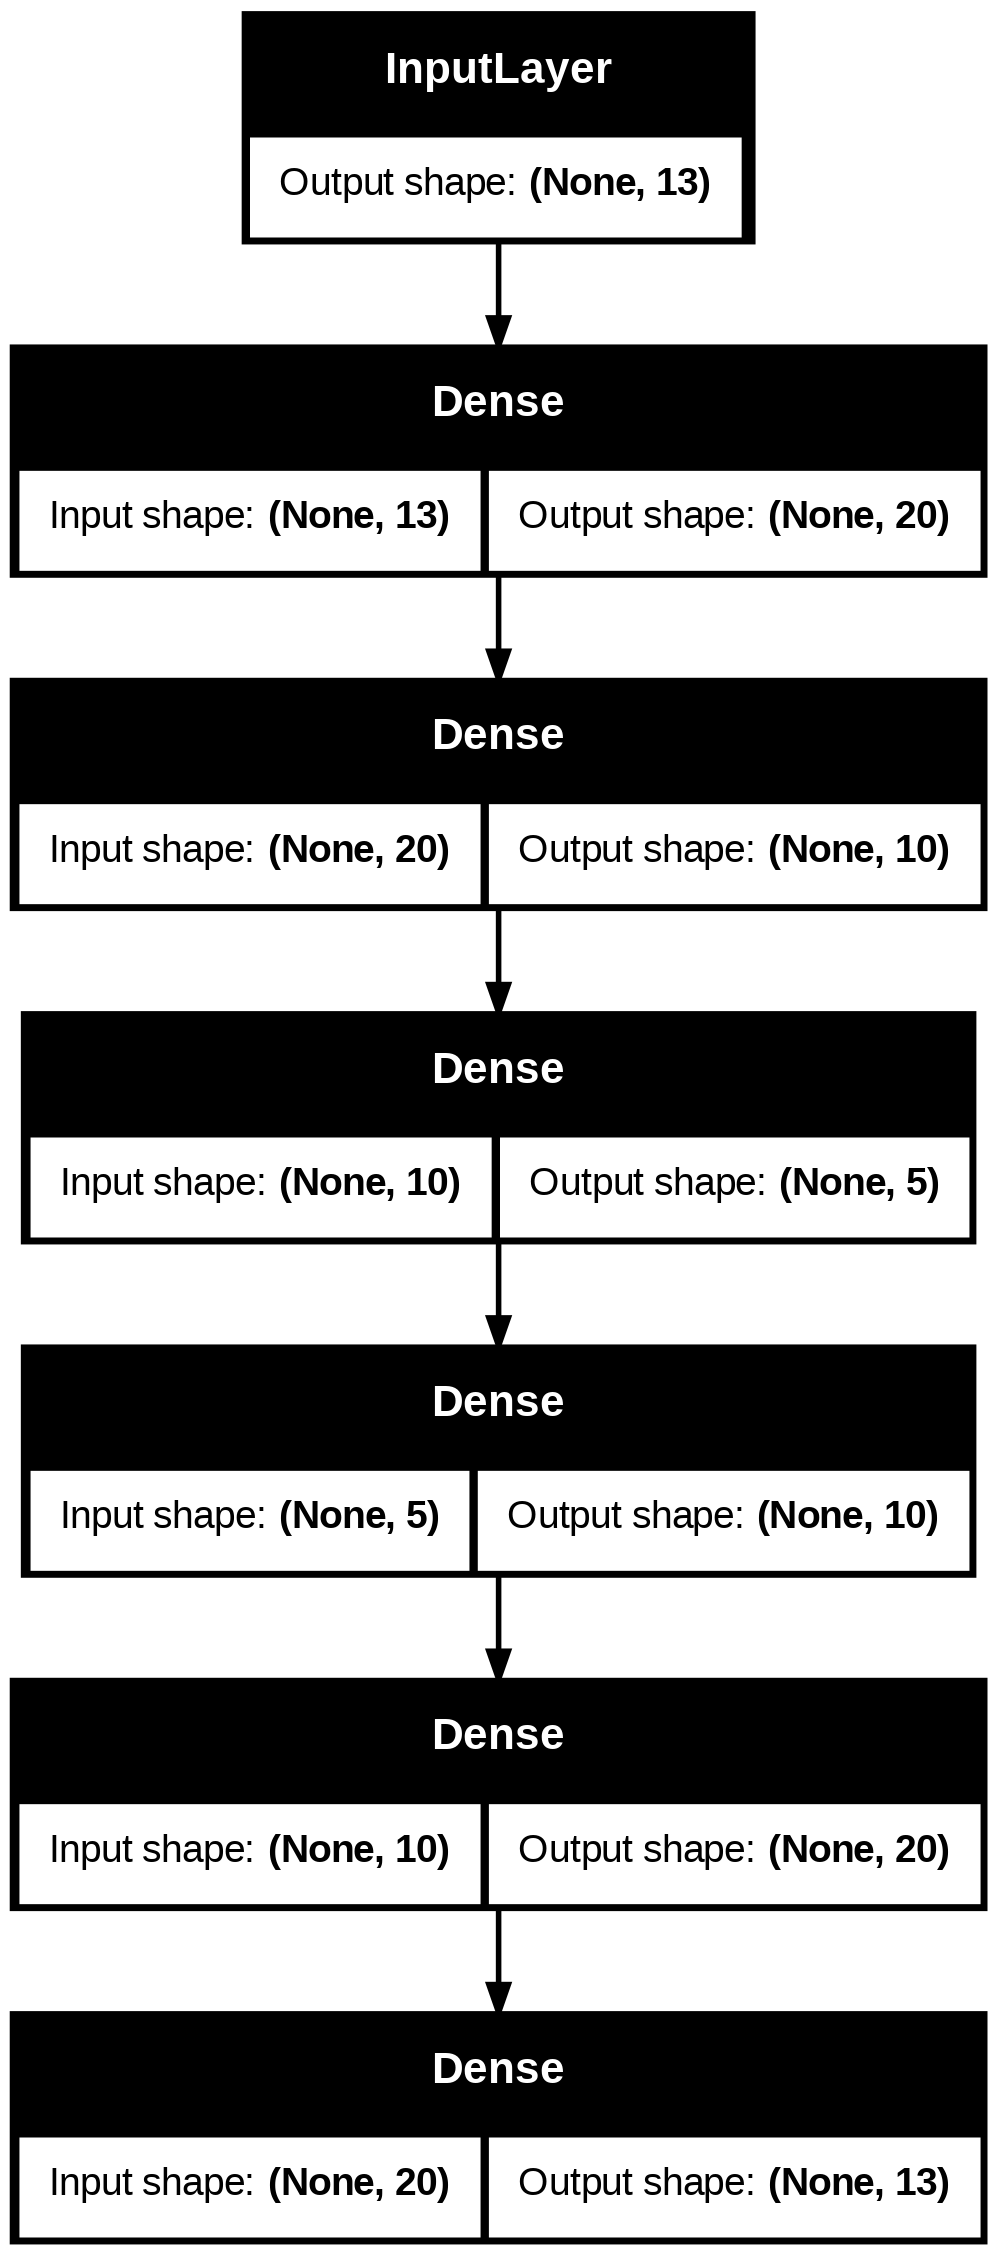

In [ ]:
autencoder_model = keras.models.Model(inputs = encoder_input, outputs = decoder_output)
keras.utils.plot_model(autencoder_model,'autoencoder_f.png',show_shapes=True)

In [ ]:
autencoder_model.compile(optimizer='adam',loss = 'mean_squared_error',metrics = ['mae'])
autencoder_model.fit(X_f,X_f,batch_size=64,epochs=20)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8.5169 - mae: 1.1484
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3533 - mae: 0.2744
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1589 - mae: 0.1968
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1337 - mae: 0.1772
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1038 - mae: 0.1574
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0918 - mae: 0.1420
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0989 - mae: 0.1327
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0767 - mae: 0.1244
Epoch 9/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0712 - mae: 0.1237
Epoch 10/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0679 - mae: 0.1233
Epoch 11/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0560 - mae: 0.1172
Epoch 12/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0610 - mae: 0.1062
Epoch 13/20
191/191 ━━━━━

In [ ]:
encoder_model = keras.models.Model(inputs = encoder_input, outputs = encoder_output)

features_extracted_f= encoder_model.predict(X_f)

382/382 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_extracted_f, y_f, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)

# Train the model
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6554690700532568
              precision    recall  f1-score   support

           0       0.67      0.69      0.68      1296
           1       0.64      0.62      0.63      1145

    accuracy                           0.66      2441
   macro avg       0.65      0.65      0.65      2441
weighted avg       0.66      0.66      0.66      2441

Confusion Matrix:
 [[888 408]
 [433 712]]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_extracted_f, y_f, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

# Train the model
gb.fit(X_train, y_train)

# Predict on test set
y_pred = gb.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6820975010241704
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1296
           1       0.67      0.63      0.65      1145

    accuracy                           0.68      2441
   macro avg       0.68      0.68      0.68      2441
weighted avg       0.68      0.68      0.68      2441

Confusion Matrix:
 [[944 352]
 [424 721]]
